In [1]:
import sys
sys.path.append("../../")

In [2]:
from delay.delay import *
import delay.calculator as calc
from delay.strategy import fA_Smooth, fB_Smooth, showSmoothFunctions
from delay.simulation import Simulation, FunctionType
from delay.regression import linearRegression, Dependence
from delay.value import calculateValue

In [3]:
filePrefix = 'exp-smooth'

In [4]:
simulation = Simulation(FunctionType.SMOOTH, (0, 0), calculateValue, calc.smooth(d=20))
simulation.setN(100)
simulation.setConv(100)
simulation.setDuration(100000000) # 10^8
simulation.setD(20)
simulation.setOmega(1)

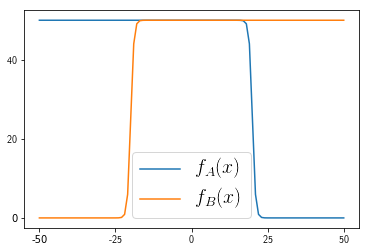

In [5]:
N = 100
showSmoothFunctions(fA_Smooth, fB_Smooth, N, d=20, omega=1)

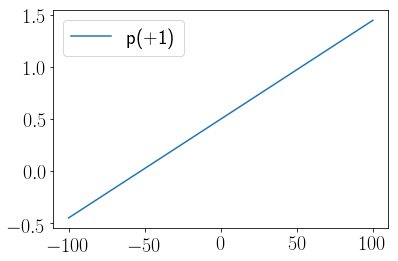

In [6]:
calc.plot(calc.smooth(d=20))

µ =  -0.005339043850994661


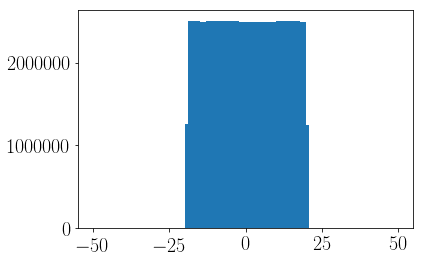

In [7]:
simulation.setTau((0, 0))
simulation.run()
simulation.plotOnlyHistogram('../../../draft/img/results/'+filePrefix+'/histogram0')

µ =  -3.0303840120205594


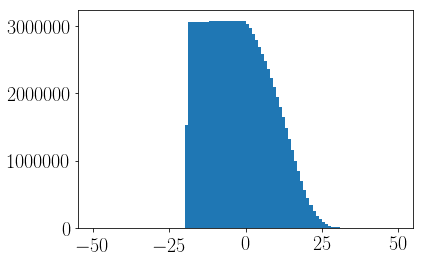

In [8]:
simulation.setTau((20, 0))
simulation.run()
simulation.plotOnlyHistogram('../../../draft/img/results/'+filePrefix+'/histogram-tauA')

µ =  3.0582739151539933


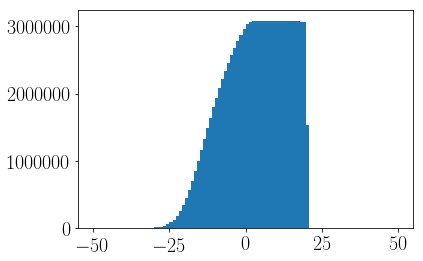

In [9]:
simulation.setTau((0, 20))
simulation.run()
simulation.plotOnlyHistogram('../../../draft/img/results/'+filePrefix+'/histogram-tauB')

d, τ, µ
20 ,  0 ,  0.008167726690991832
20 ,  10 ,  -1.571635850705127
20 ,  20 ,  -3.0241054054784127
20 ,  30 ,  -4.104035311280182
20 ,  40 ,  -4.597397944861329
20 ,  50 ,  -4.677414295948304
20 ,  60 ,  -4.718201452042319
20 ,  70 ,  -4.664218860290638
20 ,  80 ,  -4.658427759449459
20 ,  90 ,  -4.64335214976452
20 ,  100 ,  -4.614513660707273
20 ,  110 ,  -4.564271180777067
20 ,  120 ,  -4.49051484796183
20 ,  130 ,  -4.482828540348647
20 ,  140 ,  -4.434290776727678
20 ,  150 ,  -4.389546456430494
20 ,  160 ,  -4.305792726946405
20 ,  170 ,  -4.290153079146149
20 ,  180 ,  -4.216971404422201
20 ,  190 ,  -4.1677112307946285
20 ,  200 ,  -4.134123822793396
20 ,  210 ,  -4.099000661174722
20 ,  220 ,  -4.004110231939581
20 ,  230 ,  -3.9835736753123414
20 ,  240 ,  -3.94296916436075
20 ,  250 ,  -3.9245274321793633
20 ,  260 ,  -3.8771258532868518
20 ,  270 ,  -3.8641334015386355
20 ,  280 ,  -3.8183472951736177
20 ,  290 ,  -3.7166704315321977
Mean squared error: 0.87
Variance sc

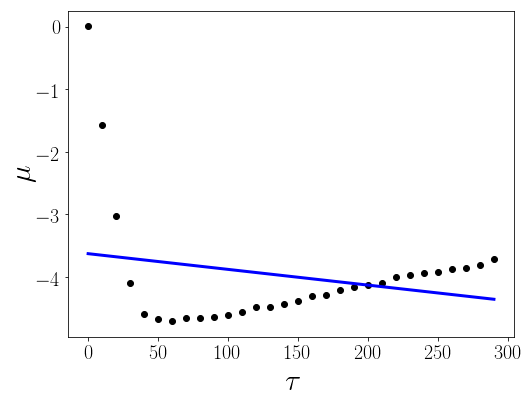

In [12]:
taus, mus = [], [] 
simulation.setD(20)

print('d, τ, µ')
for i in range(0, 30):
    tauA = i * 10
    simulation.setTau((tauA, 0))
    simulation.run()
    simulation.systematicInfo()
    taus.append(tauA)
    mus.append(simulation.getAverage())
    
linearRegression(taus, mus, Dependence.TAU, '../../../draft/img/results/'+filePrefix+'/tau-d50');
    

d, τ, µ
0 ,  50 ,  0.0010441438818748078
2 ,  50 ,  0.2208197293548735
4 ,  50 ,  -0.07296599938727905
6 ,  50 ,  -0.5713150201313528
8 ,  50 ,  -1.15559140978936
10 ,  50 ,  -1.7841545855397154
12 ,  50 ,  -2.403722246326287
14 ,  50 ,  -2.9989727477986783
16 ,  50 ,  -3.5681910393265026
18 ,  50 ,  -4.146829828099597
20 ,  50 ,  -4.682512853203765
22 ,  50 ,  -5.206164661322155
24 ,  50 ,  -5.689572485566589
26 ,  50 ,  -6.135284569461816
28 ,  50 ,  -6.593634630709409
30 ,  50 ,  -6.843751474834232
32 ,  50 ,  -7.122943461644999
34 ,  50 ,  -7.298872024777745
36 ,  50 ,  -7.446835585672418
38 ,  50 ,  -7.6101692357372634
40 ,  50 ,  -7.884084287545768
42 ,  50 ,  -7.958151236466516
44 ,  50 ,  -7.921772127108926
46 ,  50 ,  -7.521282322378253
47 ,  50 ,  -7.259145462382053
48 ,  50 ,  -6.600625946275395
49 ,  50 ,  -5.456915648537873
50 ,  50 ,  -3.216844783887549
52 ,  50 ,  -0.05831923218040963
54 ,  50 ,  -0.008286954469100131
56 ,  50 ,  -0.02582529935903323
58 ,  50 ,  -0.07310

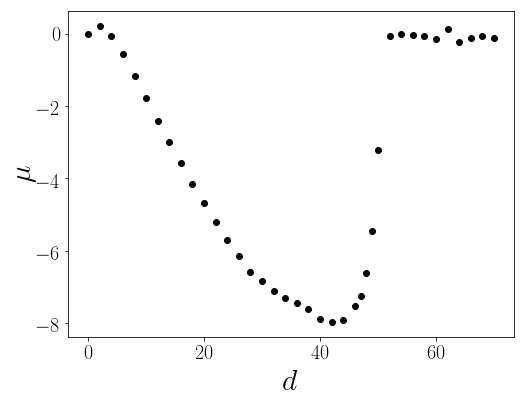

In [11]:
ds, mus = [], []
simulation.setTau((50, 0))

print('d, τ, µ')
_ = np.arange(0, 48, step=2)
_ = np.union1d(_, np.arange(47, 51))
_ = np.union1d(_, np.arange(52, 72, step=2))
for d in _:
    simulation.setD(d)
    simulation.run()
    simulation.systematicInfo()
    ds.append(d)
    mus.append(simulation.getAverage())
    
linearRegression(ds, mus, Dependence.D, '../../../draft/img/results/'+filePrefix+'/d-tau50', showFit=False);